# MNIST Digit Recognistion

### Importing some of the commonly used libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

Taking a look into the data

In [5]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None


### Dividing the data into train, test and cross-validation datasets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
cl = []
for i in range(1,29):
  for j in range(1,29):
    cl.append(str(i)+'x'+str(j))

In [9]:
X = df_train[cl]
y = df_train['label']
X_test = df_test[cl]
y_test = df_test['label']

In [10]:
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2,random_state=101)

In [11]:
print("Training data: ",len(X_train))
print("Cross-Validation data: ",len(X_cv))
print("Testing data: ",len(df_test))

Training data:  48000
Cross-Validation data:  12000
Testing data:  10000


### Visualizing the data

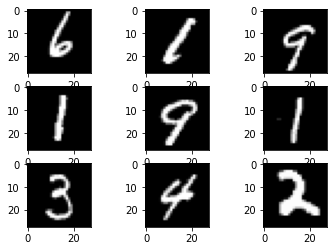

In [12]:
images = []
for i in range(9):
  arr = np.array(X_train.iloc[i])
  images.append(arr.reshape((28,28)))

for i in range(9):
    plt.subplot(331+i)
    plt.imshow(images[i],cmap=plt.get_cmap('gray')) 
plt.show()

## Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

## Training the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [97]:
model = Sequential()
model.add(Flatten())
model.add(Dense(784,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_cv,y_cv),verbose=1,callbacks=[earlystop])

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5446 - accuracy: 0.8273 - val_loss: 0.1661 - val_accuracy: 0.9473
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1861 - accuracy: 0.9461 - val_loss: 0.1169 - val_accuracy: 0.9636
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1335 - accuracy: 0.9603 - val_loss: 0.0994 - val_accuracy: 0.9678
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1153 - accuracy: 0.9654 - val_loss: 0.1049 - val_accuracy: 0.9705
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1071 - accuracy: 0.9682 - val_loss: 0.0845 - val_accuracy: 0.9747
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0912 - accuracy: 0.9722 - val_loss: 0.0903 - val_accuracy: 0.9745
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0821 - accuracy: 0.9746 - val_loss: 0.0910 - val_ac

### Analyising the results

In [27]:
loss_df = pd.DataFrame(model.history.history)

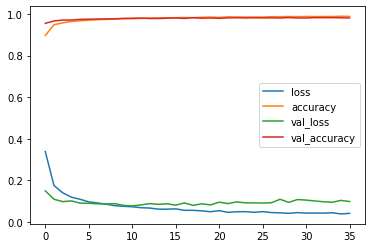

In [28]:
loss_df.plot()

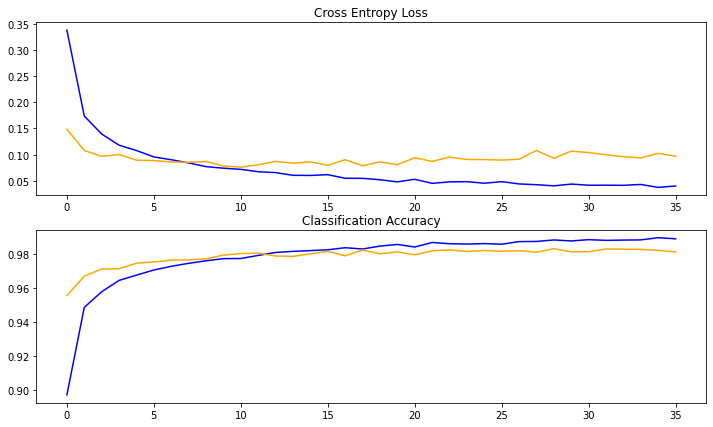

In [29]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

In [30]:
val_loss,val_acc = model.evaluate(X_cv,y_cv)
print(val_loss)
print(val_acc)

375/375 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9813
0.0971212089061737
0.981333315372467


## Evaluating the model

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
pred = np.argmax(model.predict(X_test),axis=-1)

In [33]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9819
0.0971727967262268
0.9818999767303467


In [34]:
print(accuracy_score(pred,y_test))
print()
print(classification_report(pred,y_test))
print()
print(confusion_matrix(pred,y_test))

0.9819

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       993
           1       0.99      0.99      0.99      1143
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1006
           4       0.99      0.97      0.98       999
           5       0.98      0.98      0.98       886
           6       0.98      0.99      0.98       949
           7       0.98      0.98      0.98      1030
           8       0.98      0.97      0.98       982
           9       0.96      0.99      0.97       980

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


[[ 974    0    4    0    0    2    6    0    5    2]
 [   1 1128    1    0    0    1    4    3    1    4]
 [   0    2 1013    4    2    0    0    8    2    1]
 [   0    1    1  995    0    7    0    0    0    2]
 [   0    0    1    

### Saving the model

In [35]:
model.save('mnist_digit_classification_model.h5')

In [65]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("model saved as model.json file")

model saved as model.json file


## Trying the model 

In [78]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


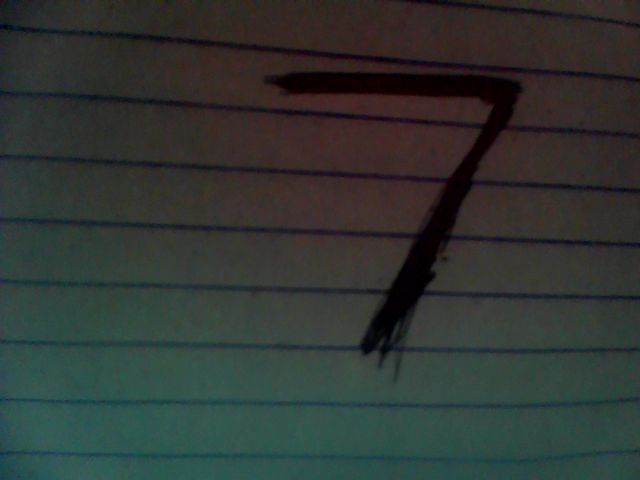

In [79]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [100]:
def load_image(filename):
  img = load_img(filename,color_mode='grayscale',target_size=(28,28))
  img = img_to_array(img)
  img = img.reshape((28,28))
  img = img.astype('float32')
  return img

def image_pred():
  img = load_image('photo.jpg')
  img = img.reshape((1,784))
  df_img = pd.DataFrame(img)
  df_img.columns = [cl]
  df_img = scaler.transform(df_img)
  predict = np.argmax(model.predict(df_img),axis=-1)
  return predict

predict = image_pred()
print(predict)

[7]
